In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
data = load_iris()
inp, y = data['data'], data['target']
X = inp[y<2]
y = y[y<2]
y[y==0] = -1
print('Shape of input: {}'.format(X.shape))

Shape of input: (100, 4)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)
print(X_train.shape, X_test.shape)

(80, 4) (20, 4)


In [4]:
import optim
import model

In [5]:
def predict(model, X, y, threshold=0):
    y_pred = model.predict(X)
    zeros = y_pred[y == -1]
    ones = y_pred[y == 1]
    y_pred[y_pred>threshold] = 1
    y_pred[y_pred<=threshold] = -1
    
    return y_pred, 1/(1+np.exp(-zeros)), 1/(1+np.exp(-ones))
    
def visualize_result(model, X, y):
    y_pred, zeros, ones = predict(model, X, y)
    print('Accuracy score: {}'.format(np.round(accuracy_score(y_pred, y), 3)))

    plt.figure(figsize=(10, 5))
    plt.plot(zeros, 'o', label='Negative')
    plt.plot(ones, 'o', label='Positive')
    plt.title('Distribution of outputs by classes')
    plt.xlabel('Number of example')
    plt.ylabel('Model output')
    plt.legend()
    plt.grid()
    plt.show()

**Classic Gradient**

In [16]:
optim_params = {'lr': 0.05, 'weight_decay': 0.1}
fit_params = {'epoch': 40, 'verbose': 0}

Logistic Regressor
	Number of input: 4
	Bias:		 True

Time spent: 0.03397846221923828
Accuracy score: 1.0


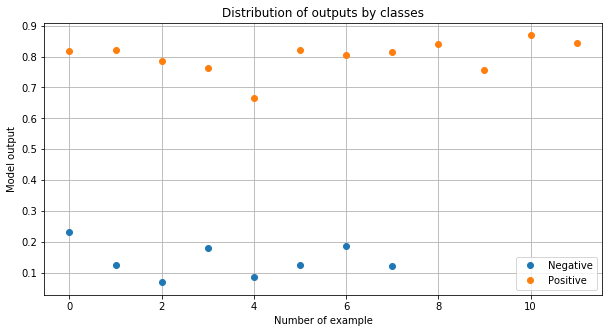

In [39]:
clf = model.LogisticRegressor(input_size=X_train.shape[1], bias=True)
classic = optim.GradientDescent(clf.W, **optim_params)
print(clf)
start = time.time()
results = clf.fit(X=X_train, y=y_train, optimizer=classic, **fit_params)
end_time = time.time()-start
print('Time spent: {}'.format(end_time))
visualize_result(clf, X_test, y_test)

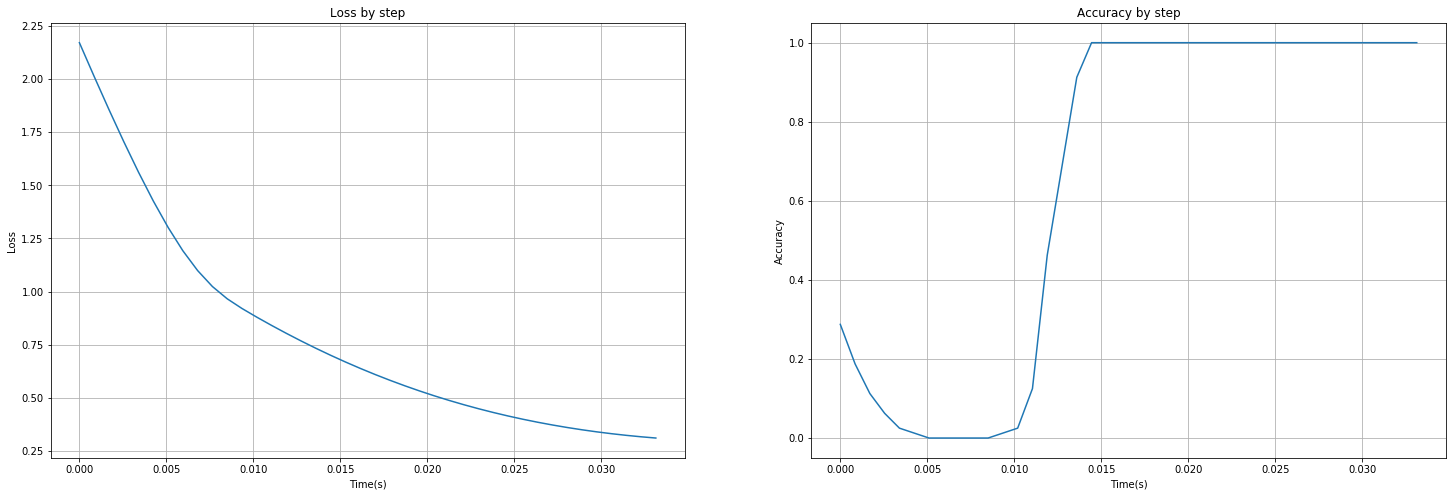

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(25, 8))
ax[0].plot([end_time*i/fit_params['epoch'] for i in range(fit_params['epoch'])], results[0])
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Time(s)')
ax[0].grid()
ax[0].set_title('Loss by time')

ax[1].plot( [end_time*i/fit_params['epoch'] for i in range(fit_params['epoch'])], results[1])
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Time(s)')
ax[1].grid()
ax[1].set_title('Accuracy by time')
plt.show()

**SGD**

In [1]:
clf = model.LogisticRegressor(input_size=X_train.shape[1], bias=True)
sgd = optim.SGD(clf.W, lr=5, weight_decay=0, verbose=False)
print(clf)
start = time.time()
clf.fit(X=X_train, y=y_train, optimizer=sgd, epoch=1, verbose=1)
print('Time spent: {}'.format(time.time()-start))
visualize_result(clf, X_test, y_test)

NameError: name 'model' is not defined